[1.02652742 1.05528453 1.08660225 1.12088466 1.1586311  1.20046722
 1.2471892  1.29982864 1.35975033 1.42880472 1.50957541 1.60580061
 1.72313426 1.87062668 2.06389667 2.33288546 2.74485069 3.49830024
 5.7076733 ] [ 23.14536014  33.64944886  42.43504003  50.54571094  58.41489127
  66.30088378  74.40031051  82.89426474  91.97585137 101.87468164
 112.88715927 125.42255076 140.08259568 157.81363711 180.22995194
 210.40051372 255.17408921 334.64683359 560.95664268] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [ 5. 10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 75. 80. 85. 90.
 95.]
   Cornering Radius  v_curve_rel  v_curve_abs  v_control_rel (C_l=0)
0               5.0     1.026527    23.145360                    NaN
1              10.0     1.055285    33.649449                    NaN
2              15.0     1.086602    42.435040                    NaN
3              20.0     1.120885    50.545711                    NaN
4              25.0     1.158631    58.414891      

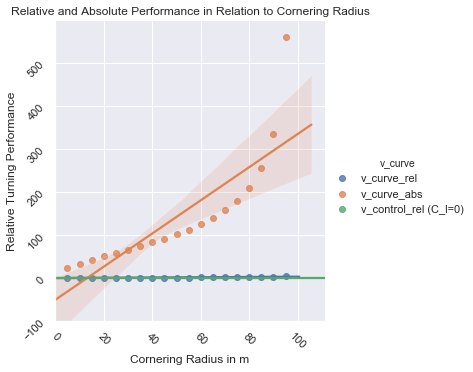

TypeError: v_max() missing 1 required positional argument: 'A'

In [11]:
'''Import local modules and plotting packages'''

import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from v_max import v_max
from v_curve import v_curve

v_abs, v_rel, v_cont, R = v_curve(250, 0.8, 1, 5)
print(v_rel, v_abs, v_cont, R)


df_curve = pd.DataFrame({'Cornering Radius': R, 'v_curve_rel': v_rel, 'v_curve_abs': v_abs, 'v_0Cl_rel': v_cont}, columns=['Cornering Radius','v_curve_rel', 'v_curve_abs', 'v_control_rel (C_l=0)'], dtype=float)
print(df_curve.head(10))

# plotting with matplotlib
# ax = plt.gca()
# df.plot(kind='line',x='Cornering Radius',y='v_curve_rel',ax=ax)
# df.plot(kind='line',x='Cornering Radius',y='v_curve_abs', color='red', ax=ax)
# plt.show()

df_curve = df_curve.melt('Cornering Radius', var_name='v_curve', value_name='Performance')

plot_curve=sns.lmplot(x='Cornering Radius', y='Performance' , hue='v_curve', data= df_curve)

plt.ylim(-100, None)
plt.xlim(0, None)

plt.xticks(rotation=-45)
plt.yticks(rotation=45)

plt.xlabel('Cornering Radius in m')
plt.ylabel('Relative Turning Performance')

#plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.title('Relative and Absolute Performance in Relation to Cornering Radius')

plt.show()

v_ms, v_kmh, cd = v_max(250, 12)
print(v_ms. v_kmh, cd)


df_topspeed = pd.DataFrame({'Drag Coefficient': cd, 'v_max_ms': v_ms, 'v_max:kmh': v_kmh}, columns=['Drag Coefficient','v_max_ms', 'v_max_kmh'], dtype=float)
print(df_topspeed.head(10))

df_topspeed = df_topspeed.melt('Drag Coefficient', var_name='v_topspeed', value_name='v_max')

plot_topspeed=sns.lmplot(x='Drag Coefficient', y='v_max' , hue='v_topspeed', data= df_topspeed)

plt.ylim(-100, None)
plt.xlim(0, None)

plt.xticks(rotation=-45)
plt.yticks(rotation=45)

plt.xlabel('Drag Coefficient, C_d')
plt.ylabel('Theoretical Topspeed, v in kmh')

plt.title('Topspeed Function over C_d')

